# Experiment 1 :  
Performing floating point matrix multilication operation for varying matrix sizes on CPU.

# Goal :  
To study how performance (in GFLOPS) changes as matrix size increases, due to shifts in memory access hierarchy (L1/L2 cache to DRAM). We make this observation separately for single core, double core and quad core processing. We also observe the CPU frequency to make sure that the change in performance is just due to the change in memory access.

# Common Setup across all sub experiments:  
SBC -> Raspberry pi 5, 16GB, running Raspberry Pi OS Bookworm 64-bit
Cooling -> Active cooler (fan) and heatsink  
Power Supply -> 27W USB-C Power supply  
Measurement tools -> time command, vcgencmd  
Starting temperature -> 45.5'C  
Scripts used -> latency_freq_bench.py  

# Independent variables:  
Matrix size -> (64 x 64) to (2048 x 2048) with step size = 64   
Number of CPU cores -> (as per sub experiment)

# Dependent variables:  
Runtime (s)  
GFLOPS  
CPU Frequency


# Experiment 1.1 : 

Independent variables:  
Number of CPU cores -> 1[0]

✅ Pinned to cores: [0]
Running combined latency + frequency benchmark | BLAS threads: 1
matrix_n, avg_latency_s, avg_cpu_freq_mhz
     64, 0.000071, 1590.0 MHz
    128, 0.000114, 2120.0 MHz
    192, 0.000278, 2400.0 MHz
    256, 0.000597, 2400.0 MHz
    320, 0.000990, 2400.0 MHz
    384, 0.001476, 2400.0 MHz
    448, 0.002584, 2400.0 MHz
    512, 0.004007, 2400.0 MHz
    576, 0.005956, 2400.0 MHz
    640, 0.008403, 2400.0 MHz
    704, 0.011381, 2400.0 MHz
    768, 0.014005, 2400.0 MHz
    832, 0.017791, 2400.0 MHz
    896, 0.022111, 2400.0 MHz
    960, 0.027082, 2400.0 MHz
   1024, 0.031583, 2400.0 MHz
   1088, 0.038665, 2400.0 MHz
   1152, 0.044799, 2400.0 MHz
   1216, 0.052448, 2400.0 MHz
   1280, 0.059806, 2400.0 MHz
   1344, 0.069010, 2400.0 MHz
   1408, 0.077759, 2400.0 MHz
   1472, 0.099803, 2400.0 MHz
   1536, 0.097796, 2400.0 MHz
   1600, 0.111395, 2400.0 MHz
   1664, 0.122951, 2400.0 MHz
   1728, 0.137969, 2400.0 MHz
   1792, 0.154273, 2400.0 MHz
   1856, 0.169718, 2400.0 MHz


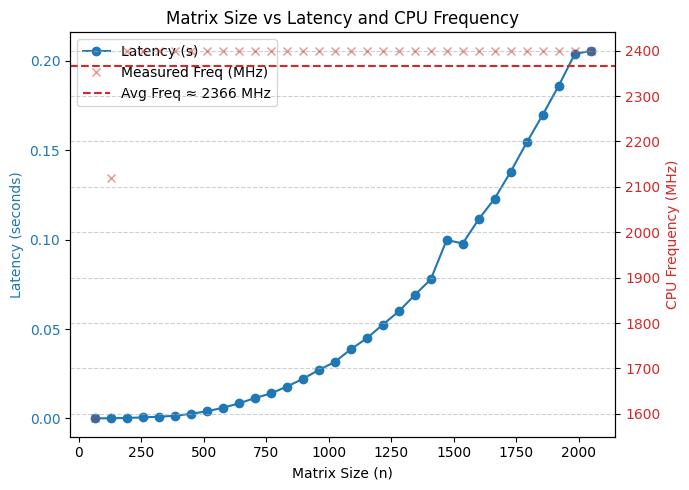

✅ Latency-Frequency plot saved to: /home/sameer/Desktop/Codespace/Experiments/Exp1/Results/matrix_size_vs_latency_freq.png


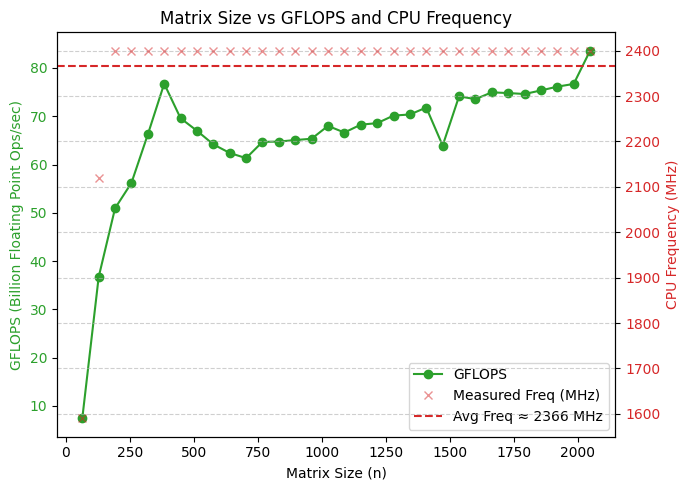

✅ GFLOPS-Frequency plot saved to: /home/sameer/Desktop/Codespace/Experiments/Exp1/Results/matrix_size_vs_gflops_freq.png


In [7]:
import sys, os, psutil

# Let Python find latency_bench.py (inside Scripts/)
sys.path.append("./Scripts")

# Output path for CSV (inside Results/)
csv_path = "./Results/latency_freq_results.csv"

# Pin to specific cores (optional)
p = psutil.Process(os.getpid())
p.cpu_affinity([0])   # use [0,1,2,3] for all cores
print("✅ Pinned to cores:", p.cpu_affinity())

# Control OpenBLAS threading
os.environ["OPENBLAS_NUM_THREADS"] = "1"  # single-core run
os.environ["OMP_NUM_THREADS"] = "1"

from latency_freq_bench import run_latency_freq_bench

run_latency_freq_bench(outfile=csv_path)

from plot_latency_freq_bench import plot_latency_and_freq, plot_gflops_and_freq

plot_latency_and_freq(csv_path="./Results/latency_freq_results.csv")
plot_gflops_and_freq(csv_path="./Results/latency_freq_results.csv")
